# Буканов Никита, Лабораторная работа №2

In [1]:
%matplotlib notebook

import numpy as np
import pandas as pd
import itertools
from scipy.optimize import linprog
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

# Задание №1

Игроки А и В записывают цифры 1 и 2. Игра состоит в том, что, кроме своей цифры каждый игрок записывает еще и ту цифру, которую по его мнению, записал соперник. Если оба игрока угадали или оба ошиблись, то партия заканчивается вничью; если же угадал только один, то он получает столько очков, какова сумма записанных им цифр.

С помощью статистического моделирования убедительно(!) подтвердите и проиллюстрируйте графиками, что оптимальные смешанные стратегии игроков описываются следующими законами распределения:

p*=[0 3/5 2/5 0] и q*=[0 3/5 2/5 0] 

Что можно сказать о цене игры?

In [2]:
def get_winner(A, B):
    AV = 0
    BV = 0
    
    if (A[1] == B[0]) and (B[1] != A[0]):
        AV = A[0] + A[1]

    if (B[1] == A[0]) and (A[1] != B[0]):
        BV = B[0] + B[1]
        
    return AV, BV

combinations = np.array(list(itertools.product(range(1,3), repeat=2)))
payment_matrix = pd.DataFrame(columns = [tuple(t) for t in combinations],
                              index = [tuple(t) for t in combinations])
for A in combinations:
    for B in combinations:
        A = tuple(A)
        B = tuple(B)
        AV, BV = get_winner(A, B)
        payment_matrix[B][A] = AV - BV

payment_matrix

,"(1, 1)","(1, 2)","(2, 1)","(2, 2)"
"(1, 1)",0,2,-3,0
"(1, 2)",-2,0,0,3
"(2, 1)",3,0,0,-4
"(2, 2)",0,-3,4,0


In [3]:
s = np.array([t for t in list(itertools.product(np.linspace(0, 1, 11), repeat=4))])
s = s[np.sum(s, axis = 1) == 1]

p_A=[0, 3/5, 2/5, 0]
optimal = 0
A = 0
B = 0

result = []
payment_matrix = np.array(payment_matrix)
for p in s:
    A_action = np.random.choice(4, 1000, p=p_A)
    B_action = np.random.choice(4, 1000, p=p)
    res = payment_matrix[A_action, B_action]
    result.append(np.sum(res[res>0]) +  np.sum(res[res<0]))
    if (p_A == p).all():
        optimal = A - B

<IPython.core.display.Javascript object>


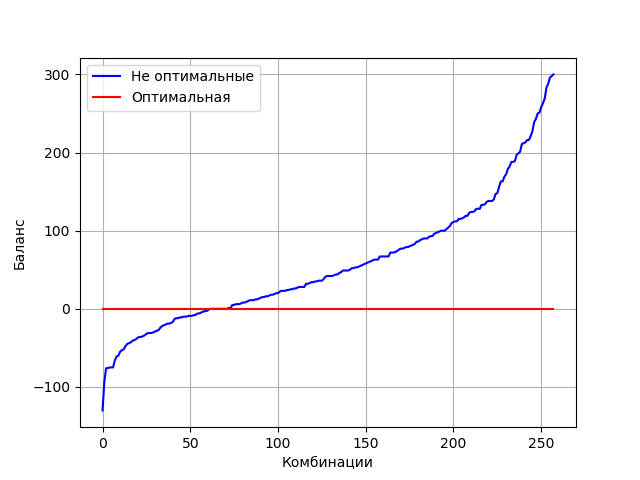

In [4]:
result.sort()

plt.figure()
plt.plot(result, 'b')
plt.plot(np.array(result)*0 + optimal, 'r')
plt.ylabel('Баланс')
plt.xlabel('Комбинации')
plt.legend(['Не оптимальные', 'Оптимальная'])
plt.grid()
plt.show()

In [5]:
p_A=[0, 3/5, 2/5, 0]
optimal = 0
A = 0
B = 0

min_value = np.zeros(len(s))
payment_matrix = np.array(payment_matrix)
for j, p in enumerate(s):
    result = 1e10
    for i, p_1 in enumerate(s):
        A_action = np.random.choice(4, 1000, p=p)
        B_action = np.random.choice(4, 1000, p=p_1)
        res = payment_matrix[A_action, B_action]
        min_value[j] = min(min_value[j], np.sum(res[res>0]) +  np.sum(res[res<0]))
        
min_ = 0
for i, p_1 in enumerate(s):
    A_action = np.random.choice(4, 1000, p=p_A)
    B_action = np.random.choice(4, 1000, p=p_1)
    res = payment_matrix[A_action, B_action]
    min_ = min(min_, np.sum(res[res>0]) +  np.sum(res[res<0]))

array([-3000., -2685., -2361., -2166., -1805., -2028., -2300., -2700.,
       -3224., -3604., -4000., -2676., -2379., -2103., -1791., -1496.,
       -1746., -2216., -2588., -2752., -3293., -2361., -2169., -1875.,
       -1515., -1239., -1376., -1794., -2572., -2136., -1815., -1458.,
       -1194.,  -926., -1160., -1830., -1893., -1497., -1227.,  -855.,
        -594.,  -874., -1306., -1449., -1242.,  -978.,  -648.,  -312.,
        -521., -1275.,  -966.,  -670.,  -117., -1348., -1058.,  -480.,
       -1586., -1307., -1000., -1786., -1485., -2000., -2600., -2268.,
       -1894., -1598., -1684., -1988., -2444., -2984., -3268., -3628.,
       -2294., -1802., -1565., -1280., -1262., -1653., -1964., -2868.,
       -1822., -1537., -1255., -1041., -1105., -1398., -2155., -1690.,
       -1266., -1082.,  -656.,  -752., -1117., -1497., -1341.,  -992.,
        -693.,  -411.,  -406.,  -783., -1074.,  -775.,  -458.,  -246.,
        -330., -1188.,  -918.,  -363., -1362., -1237.,  -846., -1618.,
      

<IPython.core.display.Javascript object>


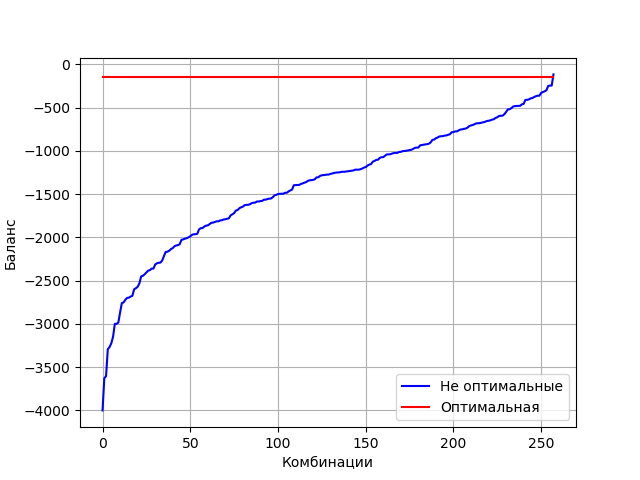

In [6]:
min_value.sort()

plt.figure()
plt.plot(min_value, 'b')
plt.plot(min_value*0 + min_, 'r')
plt.ylabel('Баланс')
plt.xlabel('Комбинации')
plt.legend(['Не оптимальные', 'Оптимальная'])
plt.grid()
plt.show()

# Задание №2

Конкурирующие фирмы А и В производят однородный сезонный товар, пользующийся спросом в течение n единиц времени. Доход от продажи товара в единицу времени составляет С ден. ед. Фирма В, будучи более состоятельной, в ходе конкурентной борьбы стремится вытеснить фирму А с рынка сбыта, способствуя своими действиями минимизации ее дохода, не считаясь при этом с временными потерями части своего дохода в надежде наверстать упущенное в будущем. Действующее законодательство не позволяет использовать для этого заведомое занижение цены на товар (прибегать к демпинговым ценам). Единственным допустимым способом достижения своей цели для фирмы В (как и для фирмы А в целях защиты своих интересов на рынке сбыта) остается повышение качества товара и надлежащий выбор момента времени поставки его на рынок сбыта. Уровень спроса на товар зависит от его качества, и в данный момент реализуется тот товар, качество которого выше. Повышение же качества требует дополнительных затрат времени на совершенствование технологии его изготовления и переналадку оборудования. Поэтому будем предполагать, что качество товара тем выше, чем позже он поступает на рынок.

С помощью статистического моделирования убедительно(!) подтвердите и проиллюстрируйте графиками, что оптимальные смешанные стратегии игроков описываются следующими законами распределения:

p*=[3/7 0 2/7 2/7 0] и q*=[0 2/7 4/7 1/7 0] 

Что можно сказать о цене игры?

In [7]:
n = 5
C = 100

combinations = np.arange(1, n+1)
payment_matrix = pd.DataFrame(columns = combinations, index = combinations)
for i in combinations:
    for j in combinations:
        if i < j:  
            payment_matrix[j][i] = C*(j-i)
        if i == j:  
            payment_matrix[j][i] = C*(n-i+1)/2
        if i > j:  
            payment_matrix[j][i] = C*(n-i+1)
payment_matrix

,1,2,3,4,5
1,250,100,200,300,400
2,400,200,100,200,300
3,300,300,150,100,200
4,200,200,200,100,100
5,100,100,100,100,50


In [8]:
p_A=[3/7, 0, 2/7, 2/7, 0]
p_B=[0, 2/7, 4/7, 1/7, 0]
payment_matrix = np.array(payment_matrix)
opt = np.sum(payment_matrix[np.random.choice(5, 1000, p=p_A)][np.random.choice(5, 1000, p=p_B)])
opt

1173050.0

In [9]:
s = np.array([t for t in list(itertools.product(np.linspace(0, 1, 11), repeat=5))])
s = s[np.sum(s, axis = 1) == 1]

In [10]:
result = []
for p in s:
    result.append(np.sum(payment_matrix[np.random.choice(5, 1000, p=p_A)][np.random.choice(5, 1000, p=p)]))

<IPython.core.display.Javascript object>


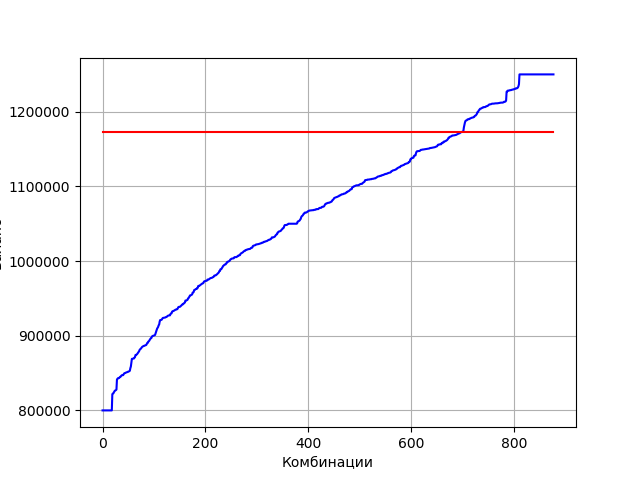

In [11]:
result.sort()

plt.figure()
plt.plot(result, 'b')
plt.plot(np.array(result)*0+opt, 'r')
plt.ylabel('Баланс')
plt.xlabel('Комбинации')
plt.grid()
plt.show()

In [12]:
result = []
for p in s:
    result.append(np.sum(payment_matrix[np.random.choice(5, 1000, p=p)][np.random.choice(5, 1000, p=p_B)]))

<IPython.core.display.Javascript object>


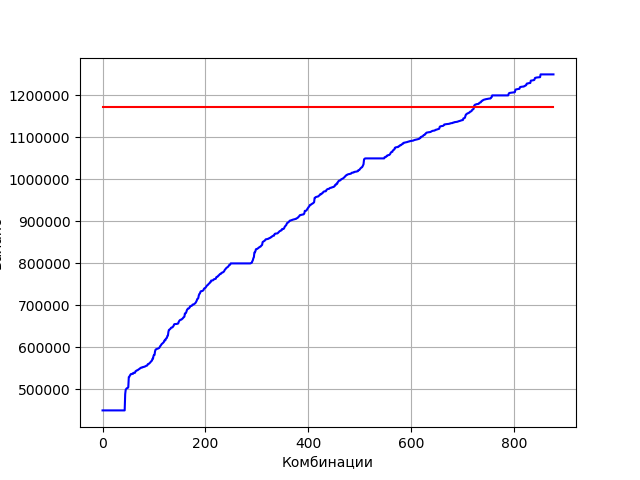

In [13]:
result.sort()

plt.figure()
plt.plot(result, 'b')
plt.plot(np.array(result)*0+opt, 'r')
plt.ylabel('Баланс')
plt.xlabel('Комбинации')
plt.grid()
plt.show()

In [14]:
result = []
for p_1 in tqdm(s):
    res = 1e10
    for p_2 in s: 
        res = min(res, 
                     (np.sum(payment_matrix[np.random.choice(5, 1000, p=p_1)][np.random.choice(5, 1000, p=p_2)])))
    result.append(res)

<IPython.core.display.Javascript object>


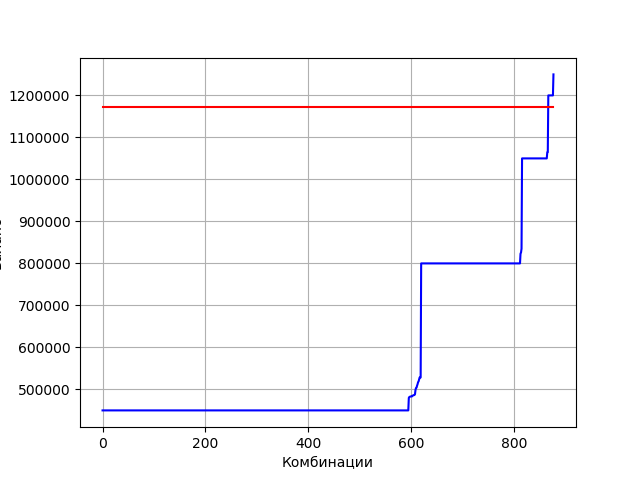

In [15]:
result.sort()
plt.figure()
plt.plot(result, 'b')
plt.plot(np.array(result)*0+opt, 'r')
plt.ylabel('Баланс')
plt.xlabel('Комбинации')
plt.grid()
plt.show()

# Задание №3

In [16]:
combinations = np.array(range(6, 9))
payment_matrix = pd.DataFrame(columns = combinations, index = combinations)
f = {6 : 8.5,
     7 : 9.0,
     8 : 9.5}
for i in combinations:
    for j in combinations:
        payment_matrix[i][j] = -7.5*j
        if i > j:
            payment_matrix[i][j] = payment_matrix[i][j] - f[i]* (i-j)
payment_matrix

,6,7,8
6,-45,-54,-64
7,-52.5,-52.5,-62
8,-60,-60,-60


In [17]:
p_B=[1/4, 1/2, 1/4]

In [18]:

payment_matrix = np.array(payment_matrix)
result = []

for i in range(3):
    result.append(np.sum(payment_matrix[i, np.random.choice(3, 1000, p=p_B)]))

<IPython.core.display.Javascript object>


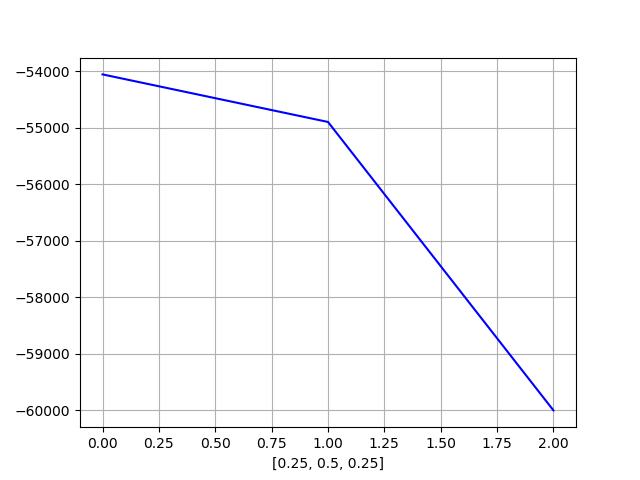

In [19]:
plt.figure()
plt.plot(result, 'b')
plt.grid()
plt.xlabel(p_B)
plt.show()

### Задание 5

Задание 4. Используя команду linprog решите следующие задачи линейного программирования(найти максимум и минимум целевой функции)для неотрицательных переменных х

1. $\begin{cases} 
f = 3x_1+2x_2 \\
x_1 + 2x_2\leq 7 \\
2x_1 + x_2 \leq 8 \\ 
x_2\leq 3 \end{cases}$

1. $\begin{cases} 
f = x_1+2x_2 \\
x_!2 + 2x_2\leq 7 \\
2x_1 + x_2 \leq 8 \\ 
x_2\leq 3 
x_1 + 2x_2 \leq 2\end{cases}$

1. $\begin{cases} 
f = -x_1-2x_2 \\
x_1 + x_2 \leq 1 \\
\end{cases}$


Используя графический метод решения задачи линейного программирования найдите решение и подтвердите ответы.

Усложните условия первых двух задач, преобразовав ограничения в виде ограничений равенств и смешанные (неравенства и равенства). Естественно размерность задачи возрастет.


<IPython.core.display.Javascript object>


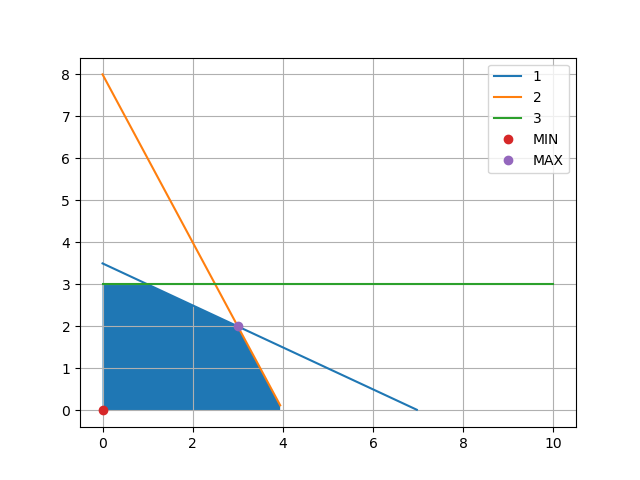

     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 0
   slack: array([7., 8., 3.])
  status: 0
 success: True
       x: array([0., 0.])


     fun: -13.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 1.])
  status: 0
 success: True
       x: array([3., 2.])

In [20]:
x = np.linspace(0,10, 100)
f1 = (7-x)/2
f2 = 8-2*x
fig = plt.figure()
plt.grid()
plt.plot(x[f1>=0], f1[f1>=0])
plt.plot(x[f2>=0], f2[f2>=0])
plt.plot(x, [3]*100)
fig.axes[0].fill_between(x[np.minimum(f1, np.minimum(f2, np.array([3]*100)))>=0],
                         0,
                         np.minimum(f1,
    np.minimum(f2, np.array([3]*100)))[np.minimum(f1, np.minimum(f2, np.array([3]*100)))>=0])
plt.plot(0,0,'o')
plt.plot(3,2,'o')
plt.legend(['1','2','3', "MIN", 'MAX'])
print(linprog([3,2], [[1,2], [2,1], [0,1]], [7,8,3]))
linprog([-3, -2], [[1,2], [2,1], [0,1]], [7,8,3])

In [21]:
x = np.linspace(0,10, 100)
print(linprog([3, 2, 0, 0, 0], [[1, 2, 1, 0, 0], [2, 1, 0, 1, 0], [0, 1, 0, 0, 1]], [7, 8, 3]))
linprog([-3, -2, 0, 0, 0], [[1, 2, 1, 0, 0], [2, 1, 0, 1, 0], [0, 1, 0, 0 ,1]], [7, 8, 3])

     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 0
   slack: array([7., 8., 3.])
  status: 0
 success: True
       x: array([0., 0., 0., 0., 0.])


     fun: -13.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 1.])
  status: 0
 success: True
       x: array([3., 2., 0., 0., 0.])

<IPython.core.display.Javascript object>


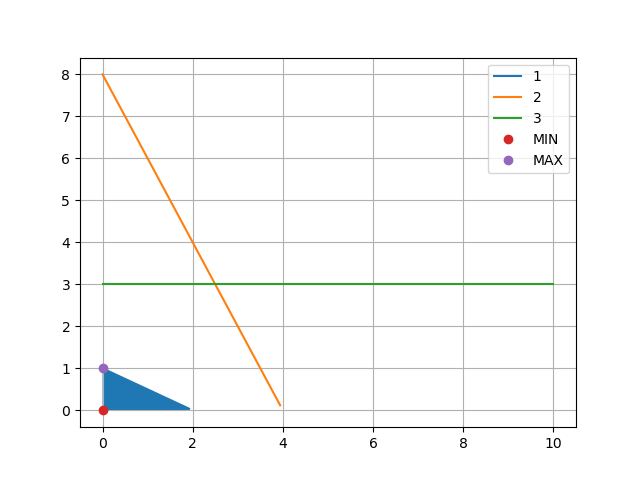

     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 0
   slack: array([2., 8., 3.])
  status: 0
 success: True
       x: array([0., 0.])


     fun: -2.0
 message: 'Optimization terminated successfully.'
     nit: 1
   slack: array([0., 7., 2.])
  status: 0
 success: True
       x: array([0., 1.])

In [22]:
x = np.linspace(0,10, 100)
f1 = (2-x)/2
f2 = 8-2*x
fig = plt.figure()
plt.grid()
plt.plot(x[f1>=0], f1[f1>=0])
plt.plot(x[f2>=0], f2[f2>=0])
plt.plot(x, [3]*100)
fig.axes[0].fill_between(x[np.minimum(f1, np.minimum(f2, np.array([3]*100)))>=0],
                         0,
                         np.minimum(f1,
    np.minimum(f2, np.array([3]*100)))[np.minimum(f1, np.minimum(f2, np.array([3]*100)))>=0])
plt.plot(0,0,'o')
plt.plot(0,1,'o')
plt.legend(['1','2','3', "MIN", 'MAX'])
print(linprog([1,2], [[1,2], [2,1], [0,1]], [2,8,3]))
linprog([-1, -2], [[1,2], [2,1], [0,1]], [2,8,3])

<IPython.core.display.Javascript object>


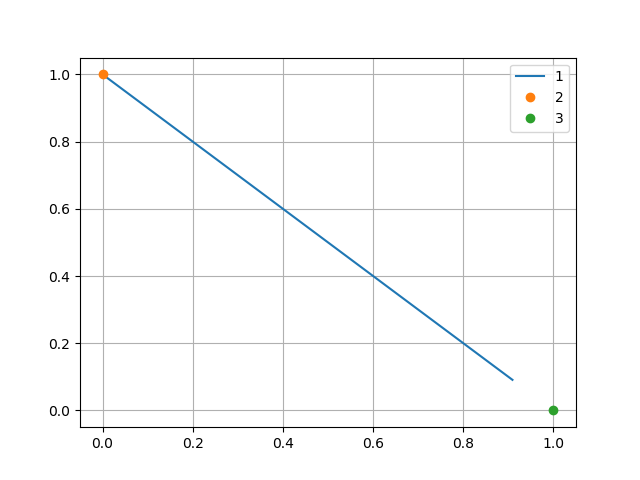

     fun: -2.0
 message: 'Optimization failed. The problem appears to be unbounded.'
     nit: 2
   slack: array([0.])
  status: 3
 success: False
       x: array([0., 1.])


     fun: 1.0
 message: 'Optimization terminated successfully.'
     nit: 1
   slack: array([0.])
  status: 0
 success: True
       x: array([1., 0.])

In [23]:
x = np.linspace(0,10, 100)
f2 = 1-x
fig = plt.figure()
plt.grid()
plt.plot(x[f2>=0], f2[f2>=0])
plt.plot(0,1,'o')
plt.plot(1,0,'o')
plt.legend(['1','2','3', "MIN", 'MAX'])
print(linprog([-1, -2], [[-1,-1]], [-1]))
linprog([1, 2], [[-1,-1]], [-1])